<a href="https://colab.research.google.com/github/niuhaoyu16/PythonforBeginners/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [70]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [71]:
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [72]:
X,y = mnist["data"], mnist["target"]

In [73]:
X.shape

(70000, 784)

In [74]:
y.shape

(70000,)

In [75]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


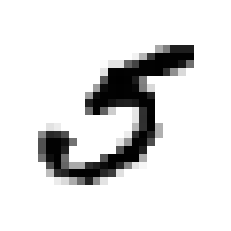

In [76]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation = "nearest")
plt.axis("off")
plt.show()

In [77]:
y[36000]

5

In [78]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [79]:
shuffle_index = np.random.permutation(60000)

In [80]:
shuffle_index

array([51747, 36302, 13031, ..., 18777, 18560, 25245])

In [81]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [82]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test ==5 )

In [83]:
from sklearn.linear_model import SGDClassifier

In [84]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
sgd_clf.predict([some_digit])

array([False])

In [86]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [87]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_folds = X_train[test_index]
  y_test_folds = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_folds)
  n_correct = sum(y_pred == y_test_folds)
  print(n_correct / len(y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95545
0.96695
0.9642


In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95545, 0.96695, 0.9642 ])

In [90]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

In [91]:
never5_clf = Never5Classifier()
cross_val_score(never5_clf, X_train, y_train_5,cv=3, scoring="accuracy")

array([0.91095, 0.9076 , 0.9104 ])

In [92]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred.shape

(60000,)

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53949,   630],
       [ 1638,  3783]])

In [94]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [95]:
from sklearn.metrics import precision_score, recall_score


In [96]:
precision_score(y_train_5, y_train_pred)


0.8572399728076139

In [97]:
recall_score(y_train_5, y_train_pred)

0.697841726618705

In [98]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7693715680292862

In [99]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-650.79792121])

In [100]:
threshold = 0
y_some_digits_pred = (y_scores > threshold)

In [101]:
y_some_digits_pred

array([False])

In [102]:
threshold = 2000
y_some_digits_pred = (y_scores > threshold)

In [103]:
y_some_digits_pred

array([False])

In [104]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [105]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [106]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label = "Prediction")
  plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
  plt.xlabel("Threshold")
  plt.legend(loc = "upper left")
  plt.ylim([0,1])

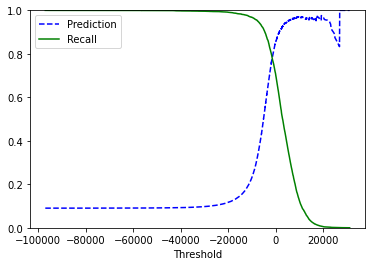

In [107]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [108]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [109]:
def plot_roc_curve(fpr, tpr, label = None):
  plt.plot(fpr, tpr, linewidth =2, label = label)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('Flase Positive Rate')
  plt.ylabel('True Positive Rate')
  

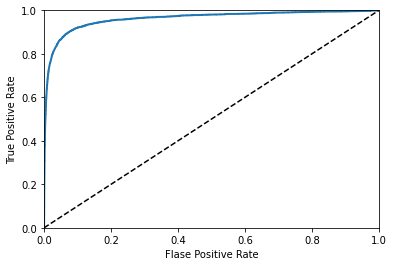

In [110]:
plot_roc_curve(fpr,tpr)
plt.show()

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
f_clf = RandomForestClassifier(random_state=42)
y_prob_f = cross_val_predict(f_clf, X_train, y_train_5,cv=3,
                             method = "predict_proba")

In [113]:
y_scores_f = y_prob_f[:,1]
fpr_f, tpr_f, thr = roc_curve(y_train_5, y_scores_f)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


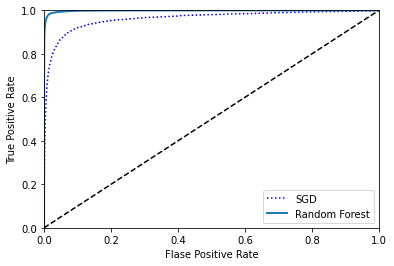

In [114]:
plt.plot(fpr,tpr, "b:", label = "SGD")
plot_roc_curve(fpr_f, tpr_f, "Random Forest")
plt.legend(loc = "bottom right")

In [115]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [117]:
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [118]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -8041.69393657, -15580.55320976, -12003.98490132,
         -4297.86768782, -19408.06919336,   -406.99370113,
        -39231.84911584, -16602.8787173 ,  -9335.2588774 ,
        -11525.6298186 ]])

In [120]:
np.argmax(some_digit_scores)


5

In [121]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [123]:
sgd_clf.classes_[5]

5

In [124]:
from sklearn.multiclass import OneVsOneClassifier

In [125]:
o_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
o_clf.fit(X_train, y_train)
o_clf.predict([some_digit])

array([5], dtype=int8)

In [126]:
len(o_clf.estimators_)

45

In [127]:
f_clf.fit(X_train, y_train)
f_clf.predict([some_digit])

array([5], dtype=int8)

In [128]:
f_clf.predict_proba([some_digit])

array([[0.06, 0.  , 0.01, 0.04, 0.01, 0.83, 0.01, 0.02, 0.02, 0.  ]])

In [129]:
cross_val_score(sgd_clf,X_train, y_train,cv=3,scoring="accuracy")

array([0.8768, 0.8869, 0.8791])

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring = "accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89295, 0.9006 , 0.89895])

In [131]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5568,    0,   16,    7,    7,   36,   31,    5,  252,    1],
       [   0, 6413,   47,   23,    3,   42,    4,    7,  193,   10],
       [  23,   23, 5235,   82,   75,   23,   67,   35,  389,    6],
       [  21,   20,  112, 5216,    0,  189,   24,   43,  437,   69],
       [  12,   15,   36,   11, 5207,    8,   35,   22,  345,  151],
       [  28,   17,   24,  156,   54, 4447,   79,   16,  538,   62],
       [  29,   17,   48,    3,   40,   92, 5535,    7,  147,    0],
       [  16,   11,   51,   23,   49,   12,    5, 5688,  202,  208],
       [  11,   66,   44,   91,    1,  119,   31,    8, 5444,   36],
       [  20,   21,   28,   59,  119,   38,    1,  174,  392, 5097]])

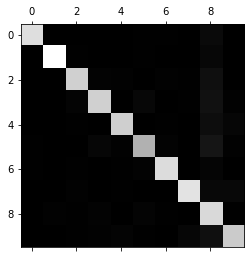

In [132]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [133]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

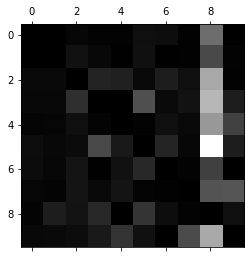

In [134]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [140]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [141]:

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [145]:
import matplotlib as mpl

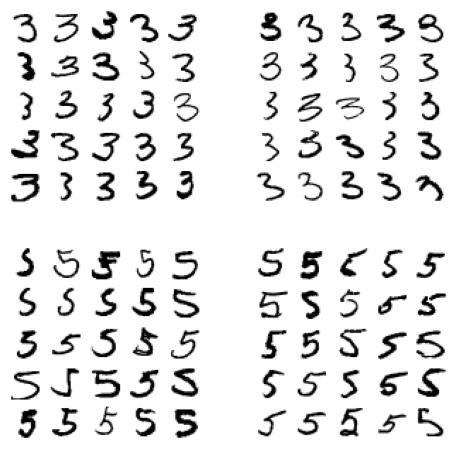

In [146]:
cl_a, cl_b = 3,5
X_aa = X_train[(y_train==cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222);plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223);plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224);plot_digits(X_bb[:25],images_per_row=5)

plt.show()

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
y_train_large = (y_train >=7)
y_train_odd = (y_train % 2==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [151]:
y_multilabel

array([[ True, False],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [False, False]])

In [152]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [153]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [154]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train, y_train,cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

0.9685701865824757

In [157]:
noise1 = np.random.randint(0,100,(len(X_train), 784))
noise2 = np.random.randint(0,100,(len(X_test), 784))
X_train_mod = X_train + noise1
X_test_mod = X_test +noise2
y_train_mod = X_train
y_test_mod = X_test

In [158]:
knn_clf.fit(X_train_mod, y_train_mod)
some_index = 5500
clean_digit = knn_clf.predict([X_test_mod[some_index]])

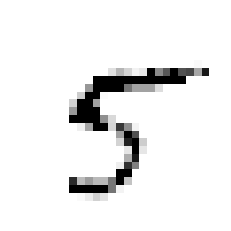

In [159]:
plot_digit(clean_digit)

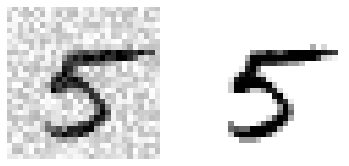

In [160]:
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])

plt.show()